# Trabajo Práctico Integrador
---

Josselyn Ordoñez - Tatiana Arenas - Jorge Valdez

# 1.- Dataset seleccionado.

*  Datos de distintas canciones en Spotify.

# 2.- Análisis exploratorio de datos (EDA)

* Visualizar las primeras filas. 
* Realizar un resumen de 5 números. 
* Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si 
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como 
una matrícula, o un nombre propio). 
* Identificar las variables de entrada y de salida del problema. 
* Variables de entrada: 
    - Realizar los siguientes análisis por tipo de variable: 
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos. 
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada 
categoría, etc. 
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver? 
* Variables de salida (en caso de aplicar): 
    - ¿Están balanceadas las clases? 
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Info:

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

## Cargamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
DATASET_PATH = "data/"

In [3]:
# Cargamos el dataset
df = pd.read_csv(DATASET_PATH+'data_playlist.csv')

Visualizamos los primeros datos

In [4]:
# Visualizamos las primeras 5 filas
df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


## Descripción del dataset
---

1. **acousticness**: Una medida que representa la cantidad de sonido acústico en una canción. Los valores varían de 0.0 a 1.0.

2. **danceability**: Una medida que describe cuánto se presta una canción para bailar, basada en varios factores musicales. Los valores varían de 0.0 a 1.0.

3. **duration**: La duración de la canción en milisegundos.

4. **energy**: Una medida que representa la intensidad y actividad de una canción. Los valores varían de 0.0 a 1.0.

5. **instrumentalness**: Como mencioné anteriormente, es una medida que predice si una pista es instrumental o no. Los valores varían de 0.0 a 1.0.

6. **key**: La clave tonal predominante de la canción, representada como un valor entero entre 0 y 11 (donde cada número corresponde a una clave musical).

7. **liveness**: Una medida que representa la presencia de una audiencia en la grabación de la canción. Los valores varían de 0.0 a 1.0.

8. **loudness**: El volumen general de la canción en decibelios (dB).

9. **mode**: Indica la modalidad de la canción (mayor o menor), representada como un valor binario (1 = Mayor, 0 = Menor).

10. **speechiness**: Una medida que representa la presencia de palabras habladas en una canción. Los valores varían de 0.0 a 1.0.

11. **tempo**: El tempo general de la canción en latidos por minuto (BPM).

12. **time_signature**: Una indicación general del número de beats en cada barra o compás de la canción.

13. **valence**: Una medida que representa la positividad transmitida por una canción. Los valores varían de 0.0 a 1.0.

14. **label**: indica si la canción le gusta o no a un usuario. 0 = no le gusta, 1 = si le gusta



In [5]:
# Mostramos la información del dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


Podemos ver que todas las columnas son leidas como tipo númerico. Luego veremos cuales son categóricas.

In [6]:
# Veo los valores únicos de la columna "key"
print("Valores únicos de columna 'key'",np.sort(df['key'].unique()))


Valores únicos de columna 'key' [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [7]:
# Veo los valores únicos de la columna "mode"
print("Valores únicos de columna 'mode'",np.sort(df['mode'].unique()))

Valores únicos de columna 'mode' [0 1]


In [8]:
# Veo los valores únicos de la columna "time_signature"
print("Valores únicos de columna 'time_signature'",np.sort(df['time_signature'].unique()))

Valores únicos de columna 'time_signature' [1 3 4 5]


Podemos argumentar que esta tres columnas son categoricas: 'key', 'mode' y 'time_signature'.

In [9]:
# Supuestos de variables independientes
NUMERICAL_FEATURES = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
CATEGORICAL_FEATURES = ['key', 'mode', 'time_signature']

# Variable objetivo
TARGET = 'label'

## Estadísticas descriptivas de variables númericas

In [10]:
# Mostramos un resumen estadístico de las columnas numéricas
df[NUMERICAL_FEATURES].describe() 

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,0.203376,-8.509339,0.098966,120.405761,0.497321
std,0.338405,0.172036,65587.690483,0.253301,0.259921,0.177609,5.039488,0.104715,28.378116,0.239615
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.024000,-29.601000,0.023400,55.747000,0.033200
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,0.094550,-10.173500,0.035900,98.998000,0.297000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,0.129000,-7.270000,0.048750,120.104500,0.483000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,0.264750,-5.097750,0.113000,138.074750,0.684500
max,0.994000,0.986000,675360.000000,0.995000,0.967000,0.979000,-0.533000,0.721000,204.162000,0.975000


## Estadísticas descriptivas de variables categóricas

In [11]:
# Mostramos un resumen estadístico de las columnas categóricas
df[CATEGORICAL_FEATURES].describe() 

,key,mode,time_signature
count,750.000000,750.000000,750.000000
mean,4.829333,0.741333,3.902667
std,3.636001,0.438194,0.400091
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,4.000000
50%,5.000000,1.000000,4.000000
75%,8.000000,1.000000,4.000000
max,11.000000,1.000000,5.000000


### Graficamos la dispersion de los datos de a pares

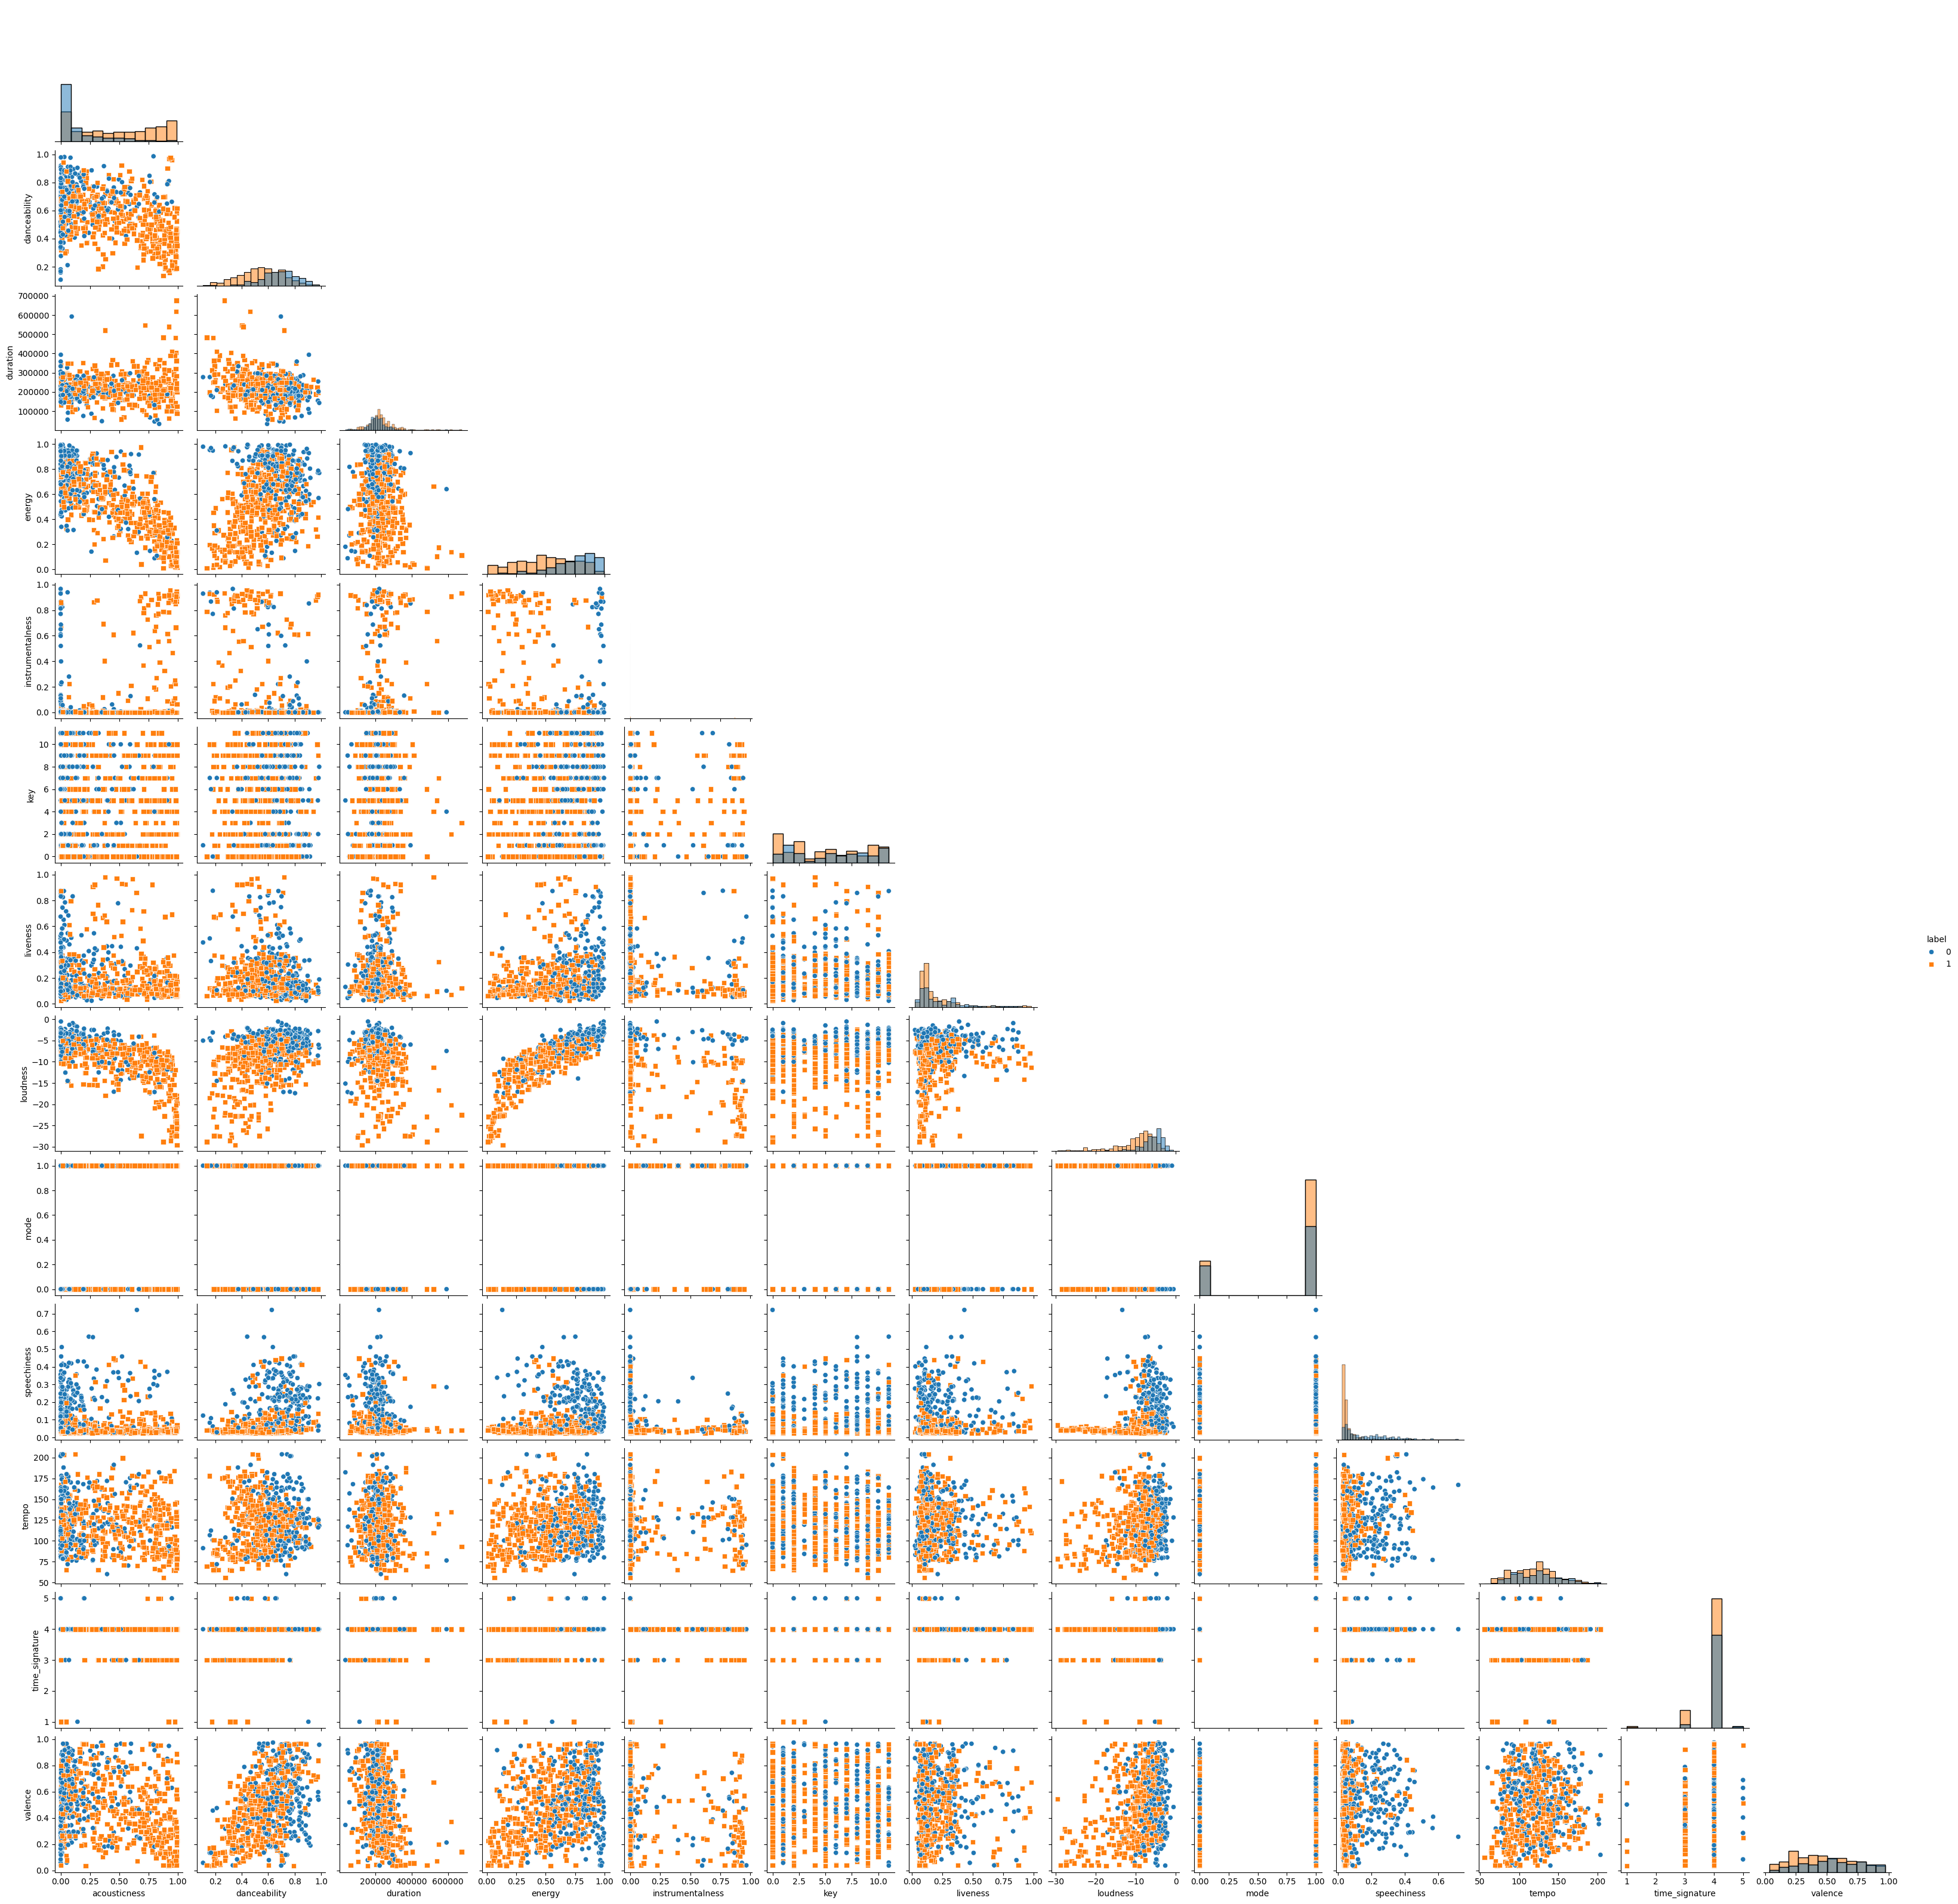

In [12]:
sns.pairplot(df, hue="label", diag_kind="hist", corner=True, markers=["o", "s"])

Analizamos como estan balanceadas las variables cetgoricas, en especial la variable objetivo 'label'

<Axes: xlabel='key', ylabel='count'>

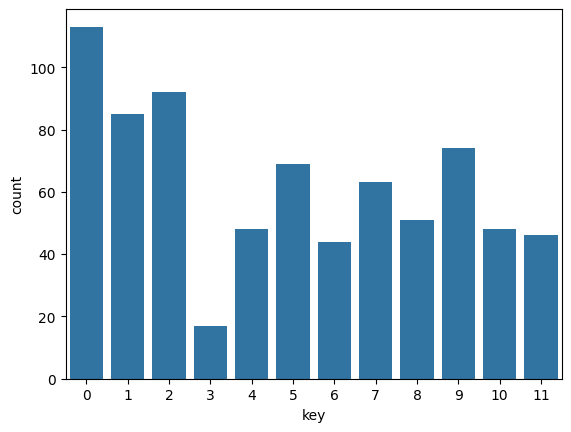

In [13]:
# Graficor la distribución de las variable key
sns.countplot(x="key", data=df)

<Axes: xlabel='mode', ylabel='count'>

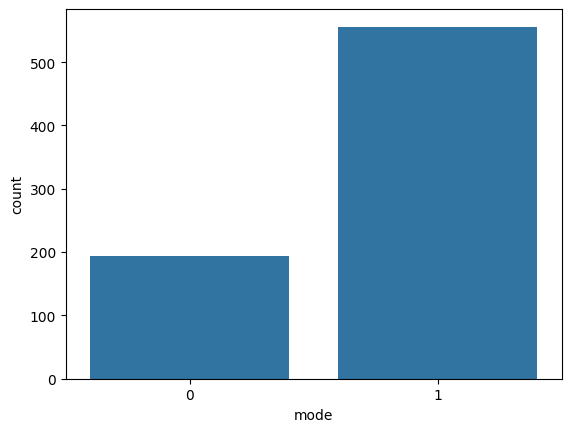

In [14]:
# Graficor la distribución de las variable mode
sns.countplot(x="mode", data=df)

<Axes: xlabel='label', ylabel='count'>

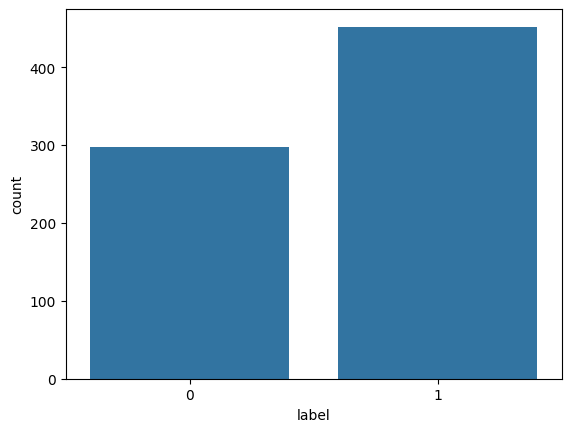

In [15]:
# Graficor la distribución de las variable label
sns.countplot(x="label", data=df)

# Sesgo y curtosis

Analizamos la distribución de las variables o carácteristicas de las canciones que hacen parte de la lista de reproducción que ha evaluado el usuario.

In [16]:
# Calculo la simetria de las variables
df_skew = df[NUMERICAL_FEATURES].skew()
df_skew

acousticness        0.534804
danceability       -0.311981
duration            1.576231
energy             -0.458765
instrumentalness    2.488166
liveness            2.156240
loudness           -1.693115
speechiness         2.040370
tempo               0.334763
valence             0.104812
dtype: float64

/tmp/ipykernel_27014/79163084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis")


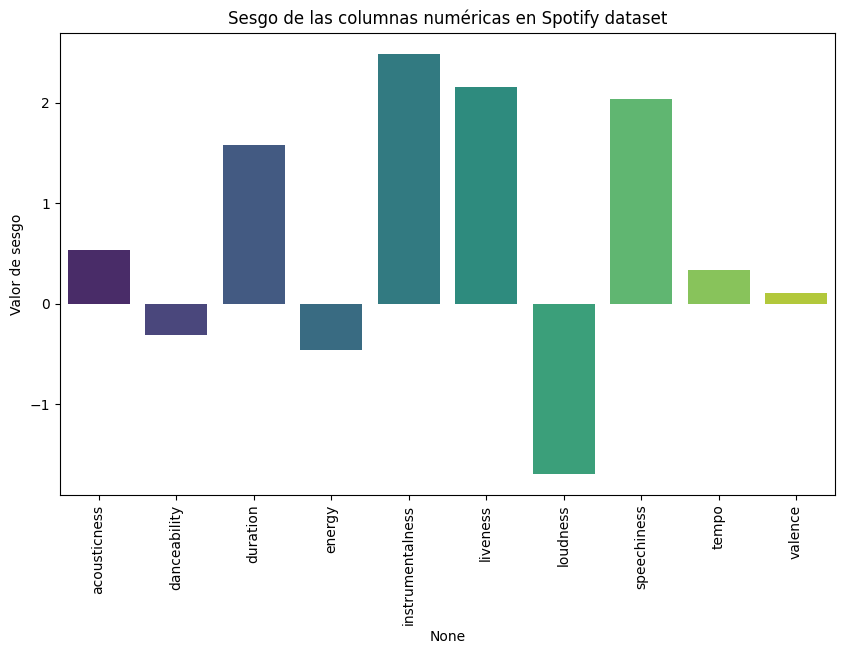

In [17]:
# Grafico la simetria de las variables

plt.figure(figsize=(10,6))
sns.barplot(x=df_skew.index, y=df_skew.values, palette="viridis")

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Sesgo de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de sesgo')

# Mostrar el gráfico
plt.show()

Los valores de sesgo-asimetría nos muestra lo siguiente del conjunto de datos:
* La distribución de las variables **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration** están altamente sesgadas. Es decir, que sus distribuciones no son normales y presenta una distribución desequilibrada. Los valores positivos nos indican que los datos tienen más peso a la derecha de la distribución y presenta colas hacia la derecha y al contrario con valores negativos. Si se quiere ver graficamente este hecho se puede observar la diagonal principal de la pairplot hecha anteriormente.

* Este tipo resultado se espera en la variable duration dado que la duración de una pista es un estandar en la insdustria músical. 

Más adelante con el cambio de estas a variables catégoricas será más evidente este sesgo. 

In [18]:
# Calculo la curtosis de las variables numéricas
df_kurtosis = df[NUMERICAL_FEATURES].kurtosis()
df_kurtosis

acousticness       -1.210296
danceability       -0.296706
duration            8.321863
energy             -0.758962
instrumentalness    4.518012
liveness            4.842701
loudness            3.232917
speechiness         4.149336
tempo              -0.246166
valence            -0.911007
dtype: float64

/tmp/ipykernel_27014/291658802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis")


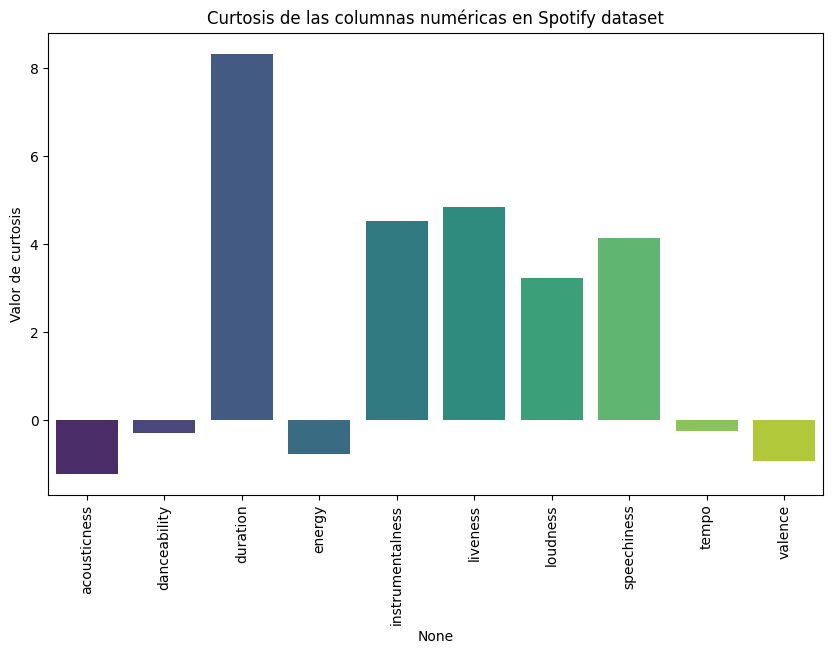

In [19]:
# Grafico kurtosis
# Crear un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_kurtosis.index, y=df_kurtosis.values, palette="viridis")

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Etiquetas del gráfico
plt.title('Curtosis de las columnas numéricas en Spotify dataset')
plt.ylabel('Valor de curtosis')

# Mostrar el gráfico
plt.show()

En este caso los datos leptocúrticos son **instrumentalness**,**liveness**, **speeachiness**, **loudness** y **duration**. Lo que significa que tenemos distribuciones con grandes concentraciones de valores en un intervalo dado.

# Grafico de boxplot

Creamos los diagramas de cajas y bigotes para las variables numericas divididas según la variable objetivo que en este caso es 'label'. Con este podemos observar en general la distribución de dichas variables.

/tmp/ipykernel_27014/616851508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=c, orient='v',data=df, palette = "rocket", showmeans=True)
/tmp/ipykernel_27014/616851508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=c, orient='v',data=df, palette = "rocket", showmeans=True)
/tmp/ipykernel_27014/616851508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=c, orient='v',data=df, palette = "rocket", showmeans=True)
/tmp/ipykernel_27014/616851508.py:5: FutureWarning: 

Passing `palette` without as

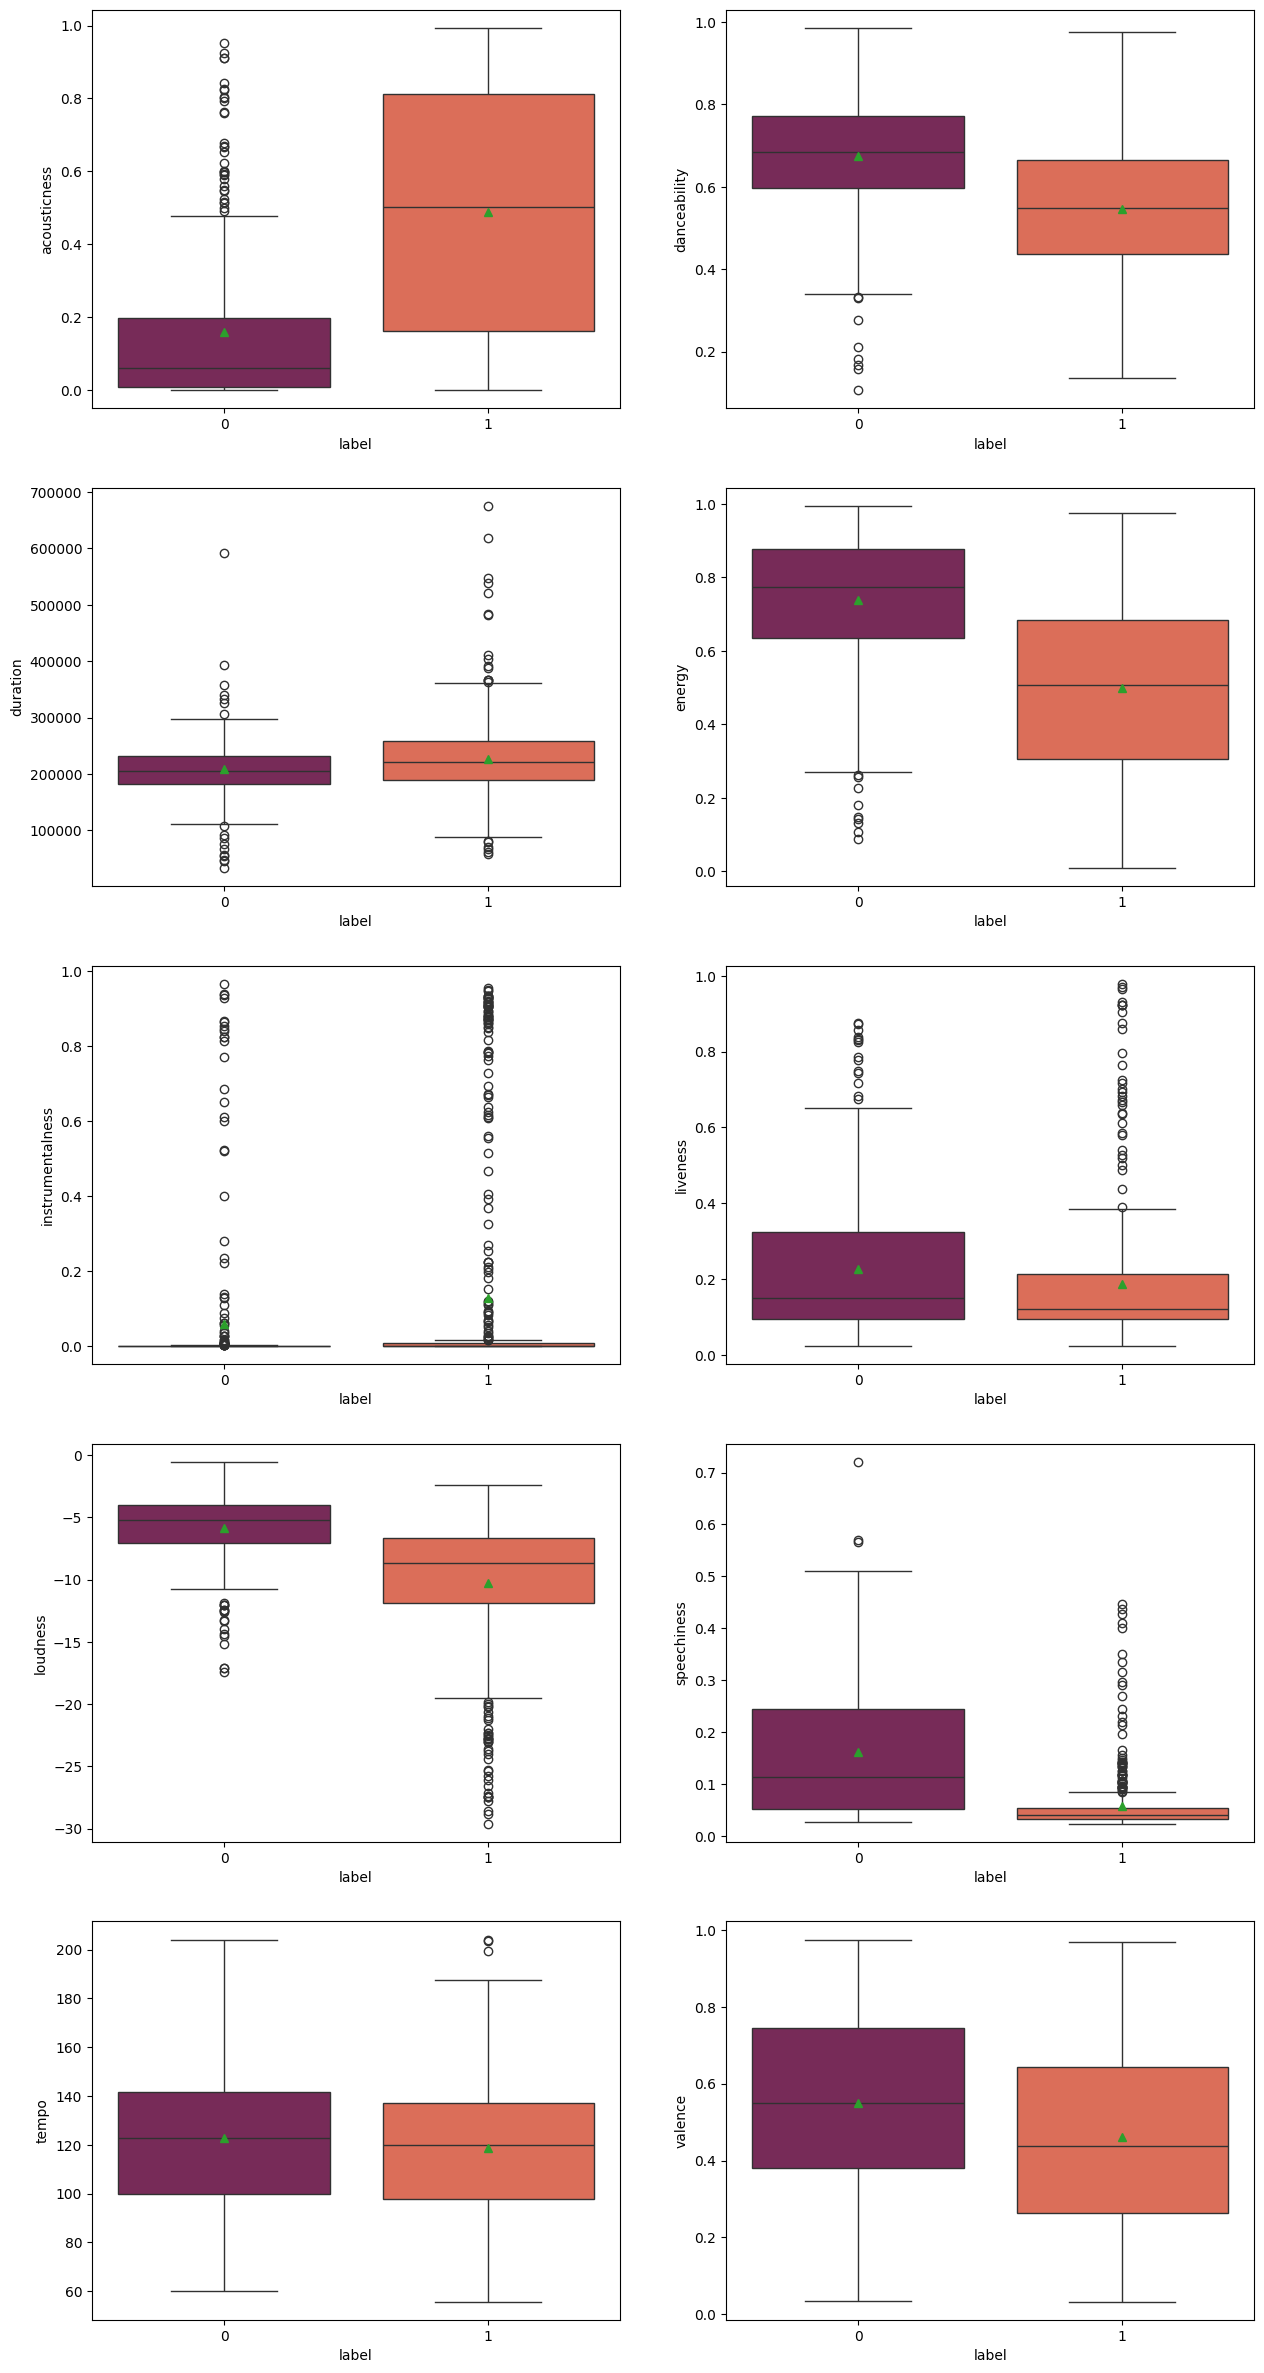

In [20]:
# creamos los diagramas de cajas y bigotes para las variables numericas
plt.figure(figsize=(15,30))
for i, c in enumerate(NUMERICAL_FEATURES, 1):
 plt.subplot(5,2,i) 
 sns.boxplot(x='label', y=c, orient='v',data=df, palette = "rocket", showmeans=True)
 

Se puede decir que dos ditribuciones son diferentes si ...

La distribución de las variables según el label dado por el usuario revela algunas preferencias marcadas :

* Según la distribución de la variable **acousticness**, el usuario tiene preferencia por pistas que con un valor mayor a 0.2. Sin embargo, hay algunas con esta característica que son outliers y no son de su gusto.
* El usuarió tiene preferencia por canciones con una **energía** por debajo de 0.6 al igual de una **loudness** por debajo de -6. Estas dos variables están altamente correlacionadas de forma lineal en la mayoría de las pistas, con una correlación de Pearson de 0.86. 
* Según la varibale **speechiness** el usuario no presenta un gusto predominante por las pistas habladas.  
* Hay variables que no parecen influir en el gusto por la pista, dado que tienen distribuciones parecidas y se pueden considerar igual, como lo son el **tempo**,**liveness**,**duration** y la **valencia**.
* El gráfico de **instrumentalness** no otroga información clara de la distribucón dada la gran cantidad de outliers. 


## Correlaciones de Pearson

<Axes: >

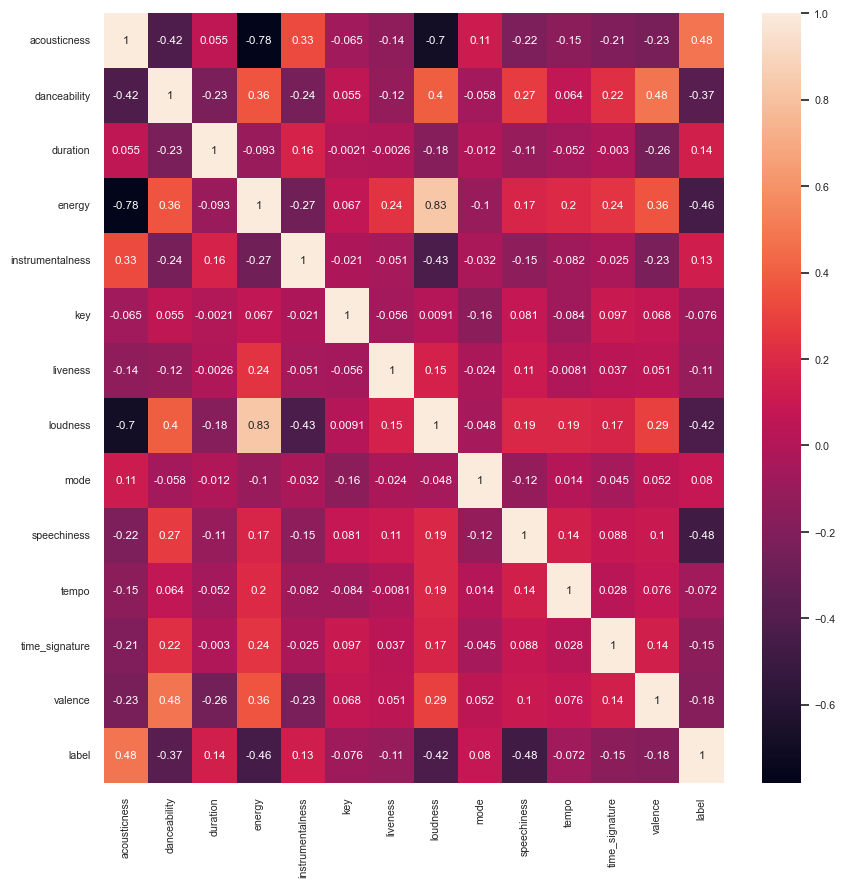

In [21]:
# Graficamos la matriz de correlación de Pearson
plt.figure(figsize=(10,10))
sns.set(font_scale=0.7)
sns.heatmap(df.corr(), annot=True)


In [22]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
df.corr()['label'].sort_values(ascending=False)

label               1.000000
acousticness        0.479307
duration            0.138562
instrumentalness    0.133523
mode                0.080375
tempo              -0.071652
key                -0.075631
liveness           -0.108682
time_signature     -0.149962
valence            -0.178546
danceability       -0.368501
loudness           -0.424345
energy             -0.459088
speechiness        -0.480931
Name: label, dtype: float64

Despues ver ordenar las variables que poseen correlación con la variable objetivo, analizaremos cada una de ellas con respecto a la variable objetivo.

### Veamos como se relacionan "acousticness" y "label"

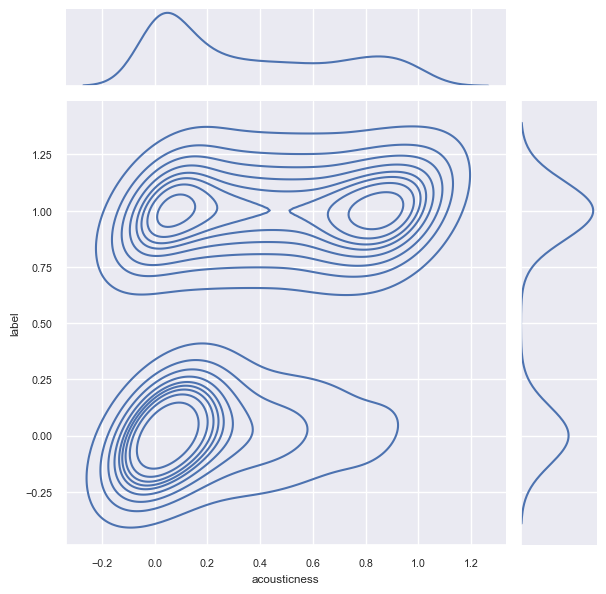

In [23]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='acousticness',y='label',data=df,kind='kde')
plt.show()

Podemos decir que a los que les gusta mas una canción poseen un nivel de gusto parejo por lo acustico, mientras que los que no les gusta canciones acusticas. (¿Creo que esta bien ese analisis?)

### Veamos ahora la relación entre "duration" y "label"

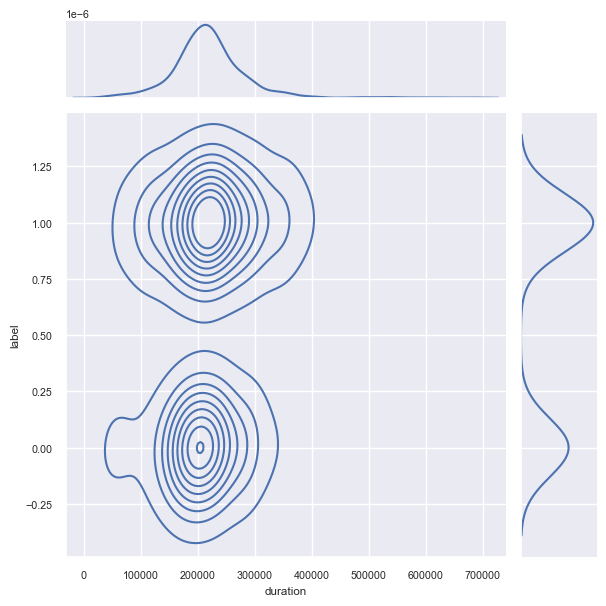

In [24]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='duration',y='label',data=df,kind='kde')
plt.show()

La duración es el estandar de la industria. Es igual sea label que sea.

### Ahora veamos la relación "instrumentalness" y "label"

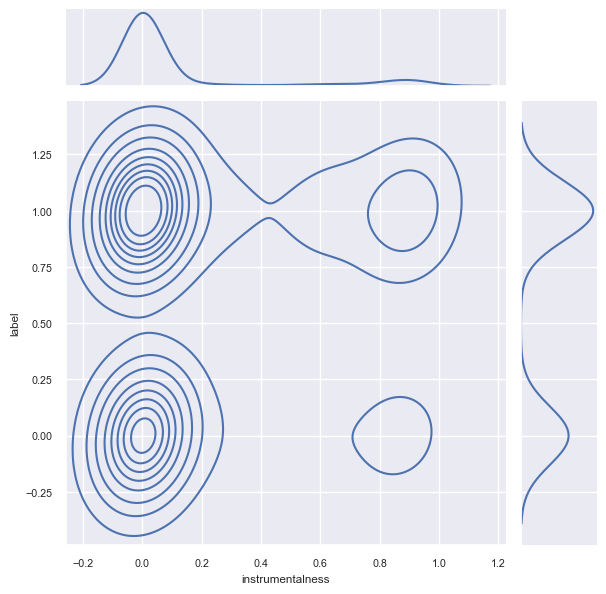

In [25]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='instrumentalness',y='label',data=df,kind='kde')
plt.show()

Según el gráfico, a los que les gusto una canción prefieren en mayor grado que no sea instrumental.
Y a los que no les gusto, escucharon escucharon canciones no instrumentales.
O sea,m la tendencia fue que se escucho mas canciones que no sean netamente instrumentales.


### Ahora veamos la relación "mode" y "label"

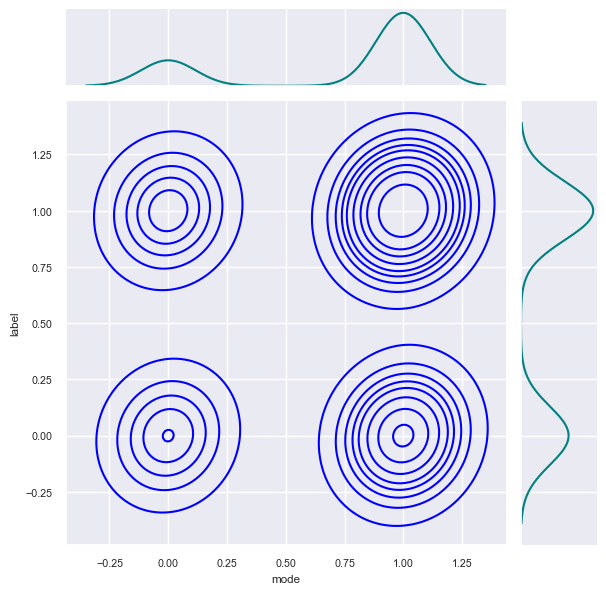

In [26]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='mode',y='label',data=df,kind='kde',color="skyblue",
                      marginal_kws={"color": "teal"}, joint_kws={ "color": "blue"})
plt.show()

## Falta

### Ahora veamos la relación "tempo" y "label"

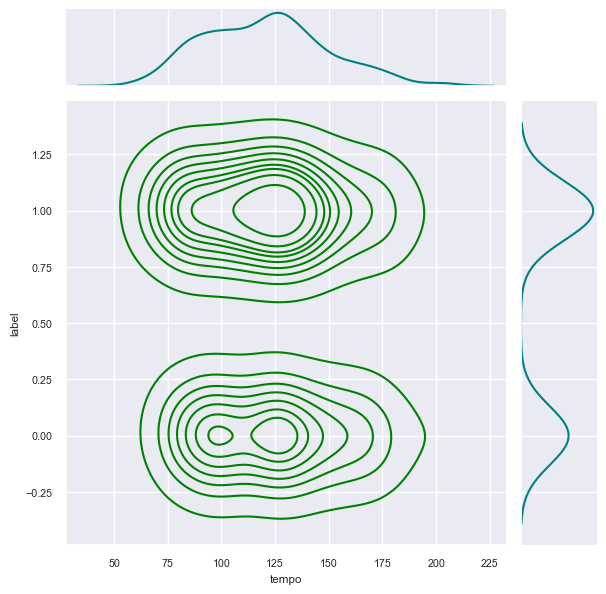

In [27]:
# Grafico jointplot de las variables más correlacionadas con la variable objetivo
sns.jointplot(x='tempo',y='label',data=df,kind='kde',color="skyblue",
                      marginal_kws={"color": "teal"}, joint_kws={ "color": "green"})
plt.show()

No se ve una correlación

Existen varias correlaciones altas que nos hacen pensar que hay variables que se relacionan e interpretan de la misma manera, en el caso de las correlaciones positivas, o son opuestas en el caso de las correlaciones negativas. Son el caso de :
* **Energy** y **loudness** que presentan una correlación de 0.83  indicandonos que pueden describir la misma característica de la canción. Si se llega a probar dicho supuesto una de ellas se debe de eliminar del modelo que se creará pues otorgaría información redundante.
* **Energy** y **acousticness** tienen una correlación negativa de -0.78. De lo que podría inferirse que  las canciones que se consideran acusticas no tienen una clasificación alta en energí y vis ceversa. Esta misma situación se nota entre **energy** u **loudness** con un puntaje de -0.7, resultado de esperarse dada la anterior correlación. 

No se observan otras correlaciones significativas en el dataset.

In [28]:
def plot_label_horizontal_bar(col, title=None):
    data = df.groupby('label')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    valoresLabel = df["label"].unique()

    data.plot.barh( valoresLabel,color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 18, 'color': '#de5d55'})
    plt.show()

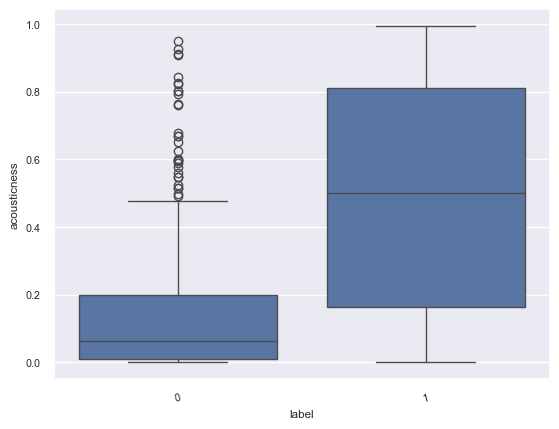

In [29]:
sns.boxplot(data=df, x='label', y='acousticness')
plt.xticks(rotation=15)
plt.show()

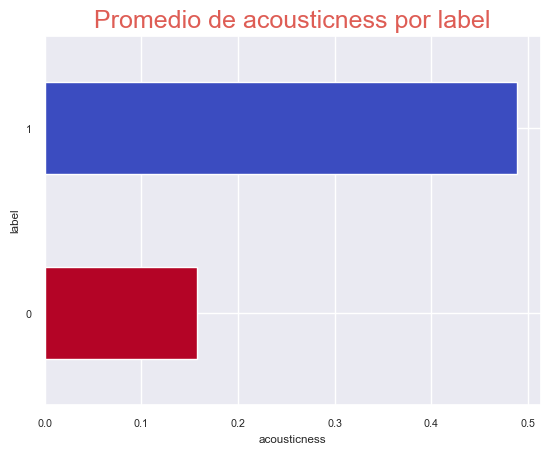

In [30]:
plot_label_horizontal_bar('acousticness', title="Promedio de acousticness por label")

- Las canciones que mas gustaron tienen una puntuacion mínima de acustica (acousticness) 

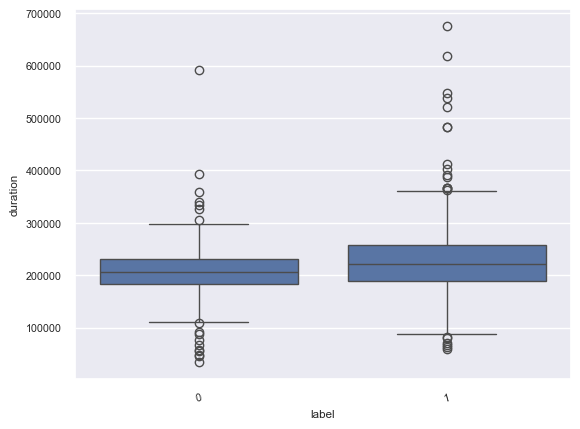

In [31]:
sns.boxplot(data=df, x='label', y='duration')
plt.xticks(rotation=15)
plt.show()

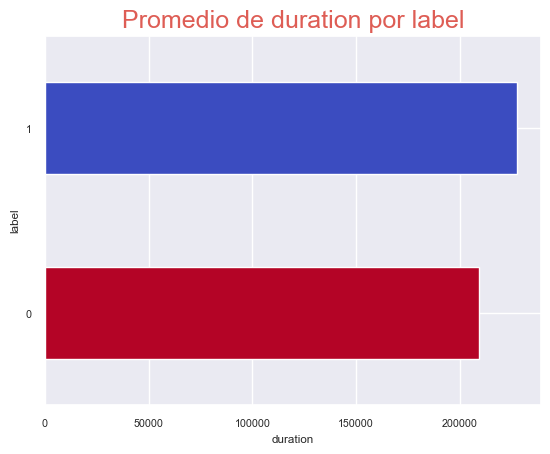

In [32]:
plot_label_horizontal_bar('duration', title="Promedio de duration por label")

- La duración de la canción sigue el estandar de la industria, no afecta a la decisión, son similares.

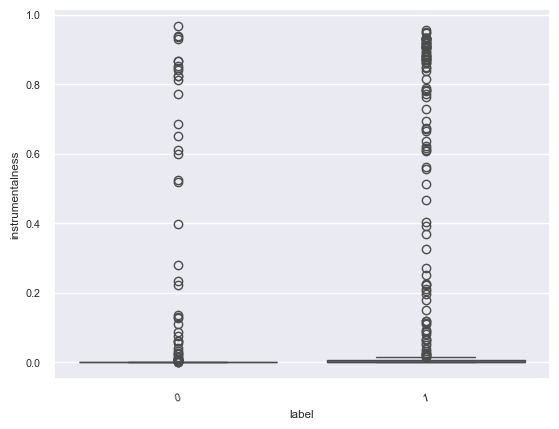

In [33]:
sns.boxplot(data=df, x='label', y='instrumentalness')
plt.xticks(rotation=15)
plt.show()

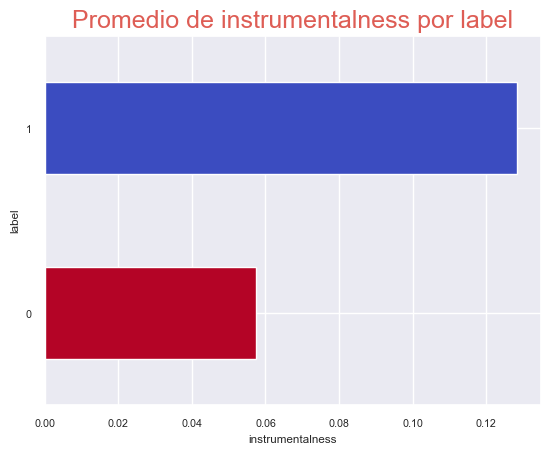

In [34]:
plot_label_horizontal_bar('instrumentalness', title="Promedio de instrumentalness por label")

- Las canciones que mas gustaron tienen una puntuacion maxima instrumental  (instrumentalness) 

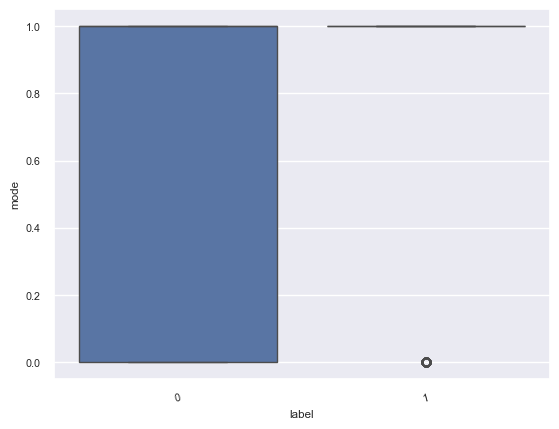

In [35]:
sns.boxplot(data=df, x='label', y='mode')
plt.xticks(rotation=15)
plt.show()

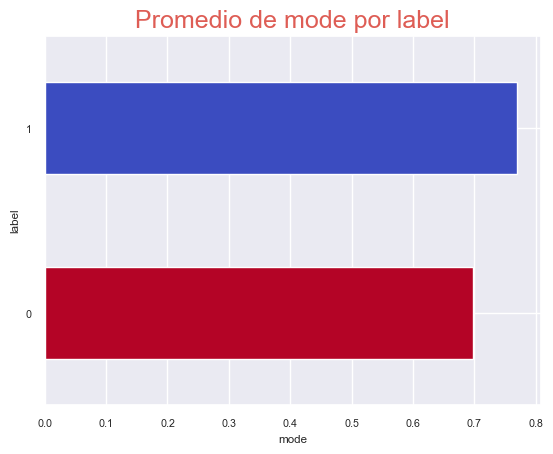

In [36]:
plot_label_horizontal_bar('mode', title="Promedio de mode por label")

- Tanto los que les gusto como los que no, prefieren canciones mas alegres y felices o sea modo cercano al 1.

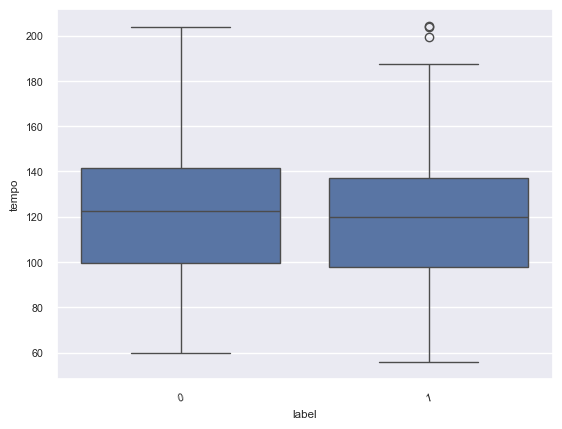

In [37]:
sns.boxplot(data=df, x='label', y='tempo')
plt.xticks(rotation=15)
plt.show()

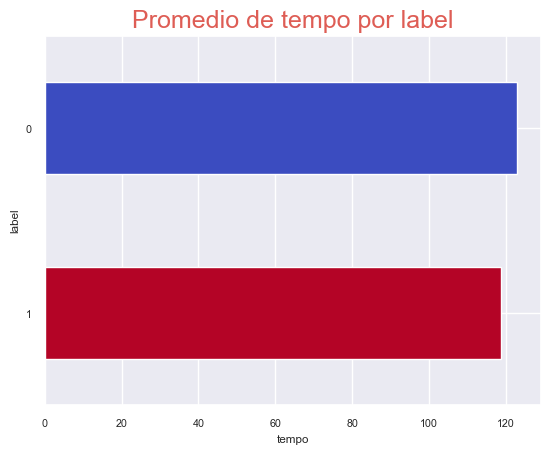

In [38]:
plot_label_horizontal_bar('tempo', title="Promedio de tempo por label")

## Conclusiones

Las siguientes columnas se podrian convertir en variables categoricas:

speechiness:
 - 0 : 0 menor a 0.33    => 
 - 1 : entre 0.33 y 0.66 => rap
 - 2 : mayor a 0.66      => audolibro

acousticness:
- 0 : 0 menor a 0.50 => No es acustico
- 1 : 1 mayor a 0.50 => Si es acustico

instrumentalness:
- 0: menor a 0.5 = vocal        => 0
- 1: mayor a 0.5 = instrumental => 1

liveness:
- 0 : menor a 0.8 = Estudio => 0
- 1 : mayor a 0.8 = En vivo => 1

valence:
- 0 : menor a 0.5 = triste => 0
- 1 : mayor a 0.5 = feliz => 1




Convertiremos las variables numericas en categóricas.

In [39]:
# Hago una copia del dataset
df_copia = df.copy() 

Columna 'speechiness'

In [40]:
# Reemplazo los valores de la columna 'speechiness' por 0, 1 o 2
df_copia['speechiness'] = df['speechiness'].apply(lambda x: 0 if x <= 0.33 else (1 if x <= 0.66 else 2))  # 0: musica, 1: rap, 2: AUdiolibro 


In [41]:
df_copia['speechiness'].value_counts()

speechiness
0    707
1     42
2      1
Name: count, dtype: int64

Columna 'acousticness'

In [42]:
# Reemplazo los valores de la columna 'acousticness' por 0 o 1 
df_copia['acousticness'] = df['acousticness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: No acustico, 1: Acustico


In [43]:
df_copia['acousticness'].value_counts()

acousticness
0    495
1    255
Name: count, dtype: int64

Columna 'instrumentalness'

In [44]:
# Reemplazo los valores de la columna 'instrumentalness' por 0 o 1
df_copia['instrumentalness'] = df['instrumentalness'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Vocal, 1: Instrumental

In [45]:
df_copia['instrumentalness'].value_counts()

instrumentalness
0    668
1     82
Name: count, dtype: int64

Columna 'liveness'

In [46]:
# Reemplazo los valores de la columna 'liveness' por 0 o 1
df_copia['liveness'] = df['liveness'].apply(lambda x: 0 if x <= 0.8 else 1) # 0: Estudio, 1: En vivo

In [47]:
df_copia['liveness'].value_counts()

liveness
0    733
1     17
Name: count, dtype: int64

Columna 'valence'

In [48]:
# Reemplazo los valores de la columna 'valence' por 0 o 1
df_copia['valence'] = df['valence'].apply(lambda x: 0 if x <= 0.5 else 1) # 0: Triste, 1: Feliz

In [49]:
df_copia['valence'].value_counts()

valence
0    385
1    365
Name: count, dtype: int64

In [50]:
CATEGORICAL_FEATURES

['key', 'mode', 'time_signature']

In [51]:
NUMERICAL_FEATURES

['acousticness',
 'danceability',
 'duration',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

Redefinimos las variables numericas y categoricas:

speechiness
acousticness
instrumentalness
liveness
valence

In [52]:
# Redefinidas
NUMERICAL_FEATURES = ['danceability', 'duration', 'energy', 'loudness', 'tempo']
CATEGORICAL_FEATURES = ['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key', 'mode', 'time_signature', 'valence']


In [53]:
# Mostramos un resumen estadístico de las columnas numéricas que quedaron
df_copia[NUMERICAL_FEATURES].describe() 

,danceability,duration,energy,loudness,tempo
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.596439,220112.733333,0.594188,-8.509339,120.405761
std,0.172036,65587.690483,0.253301,5.039488,28.378116
min,0.107000,33840.000000,0.009250,-29.601000,55.747000
25%,0.480000,185490.250000,0.423250,-10.173500,98.998000
50%,0.606000,215108.500000,0.631500,-7.270000,120.104500
75%,0.715750,244236.750000,0.804750,-5.097750,138.074750
max,0.986000,675360.000000,0.995000,-0.533000,204.162000


In [54]:
# Mostramos un resumen estadístico de las columnas categóricas incluidas las nuevas
df_copia[CATEGORICAL_FEATURES].describe() 

,acousticness,instrumentalness,liveness,speechiness,key,mode,time_signature,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.340000,0.109333,0.022667,0.058667,4.829333,0.741333,3.902667,0.486667
std,0.474025,0.312265,0.148938,0.240767,3.636001,0.438194,0.400091,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,4.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,11.000000,1.000000,5.000000,1.000000


Veo graficamente las variables categoricas nuevas

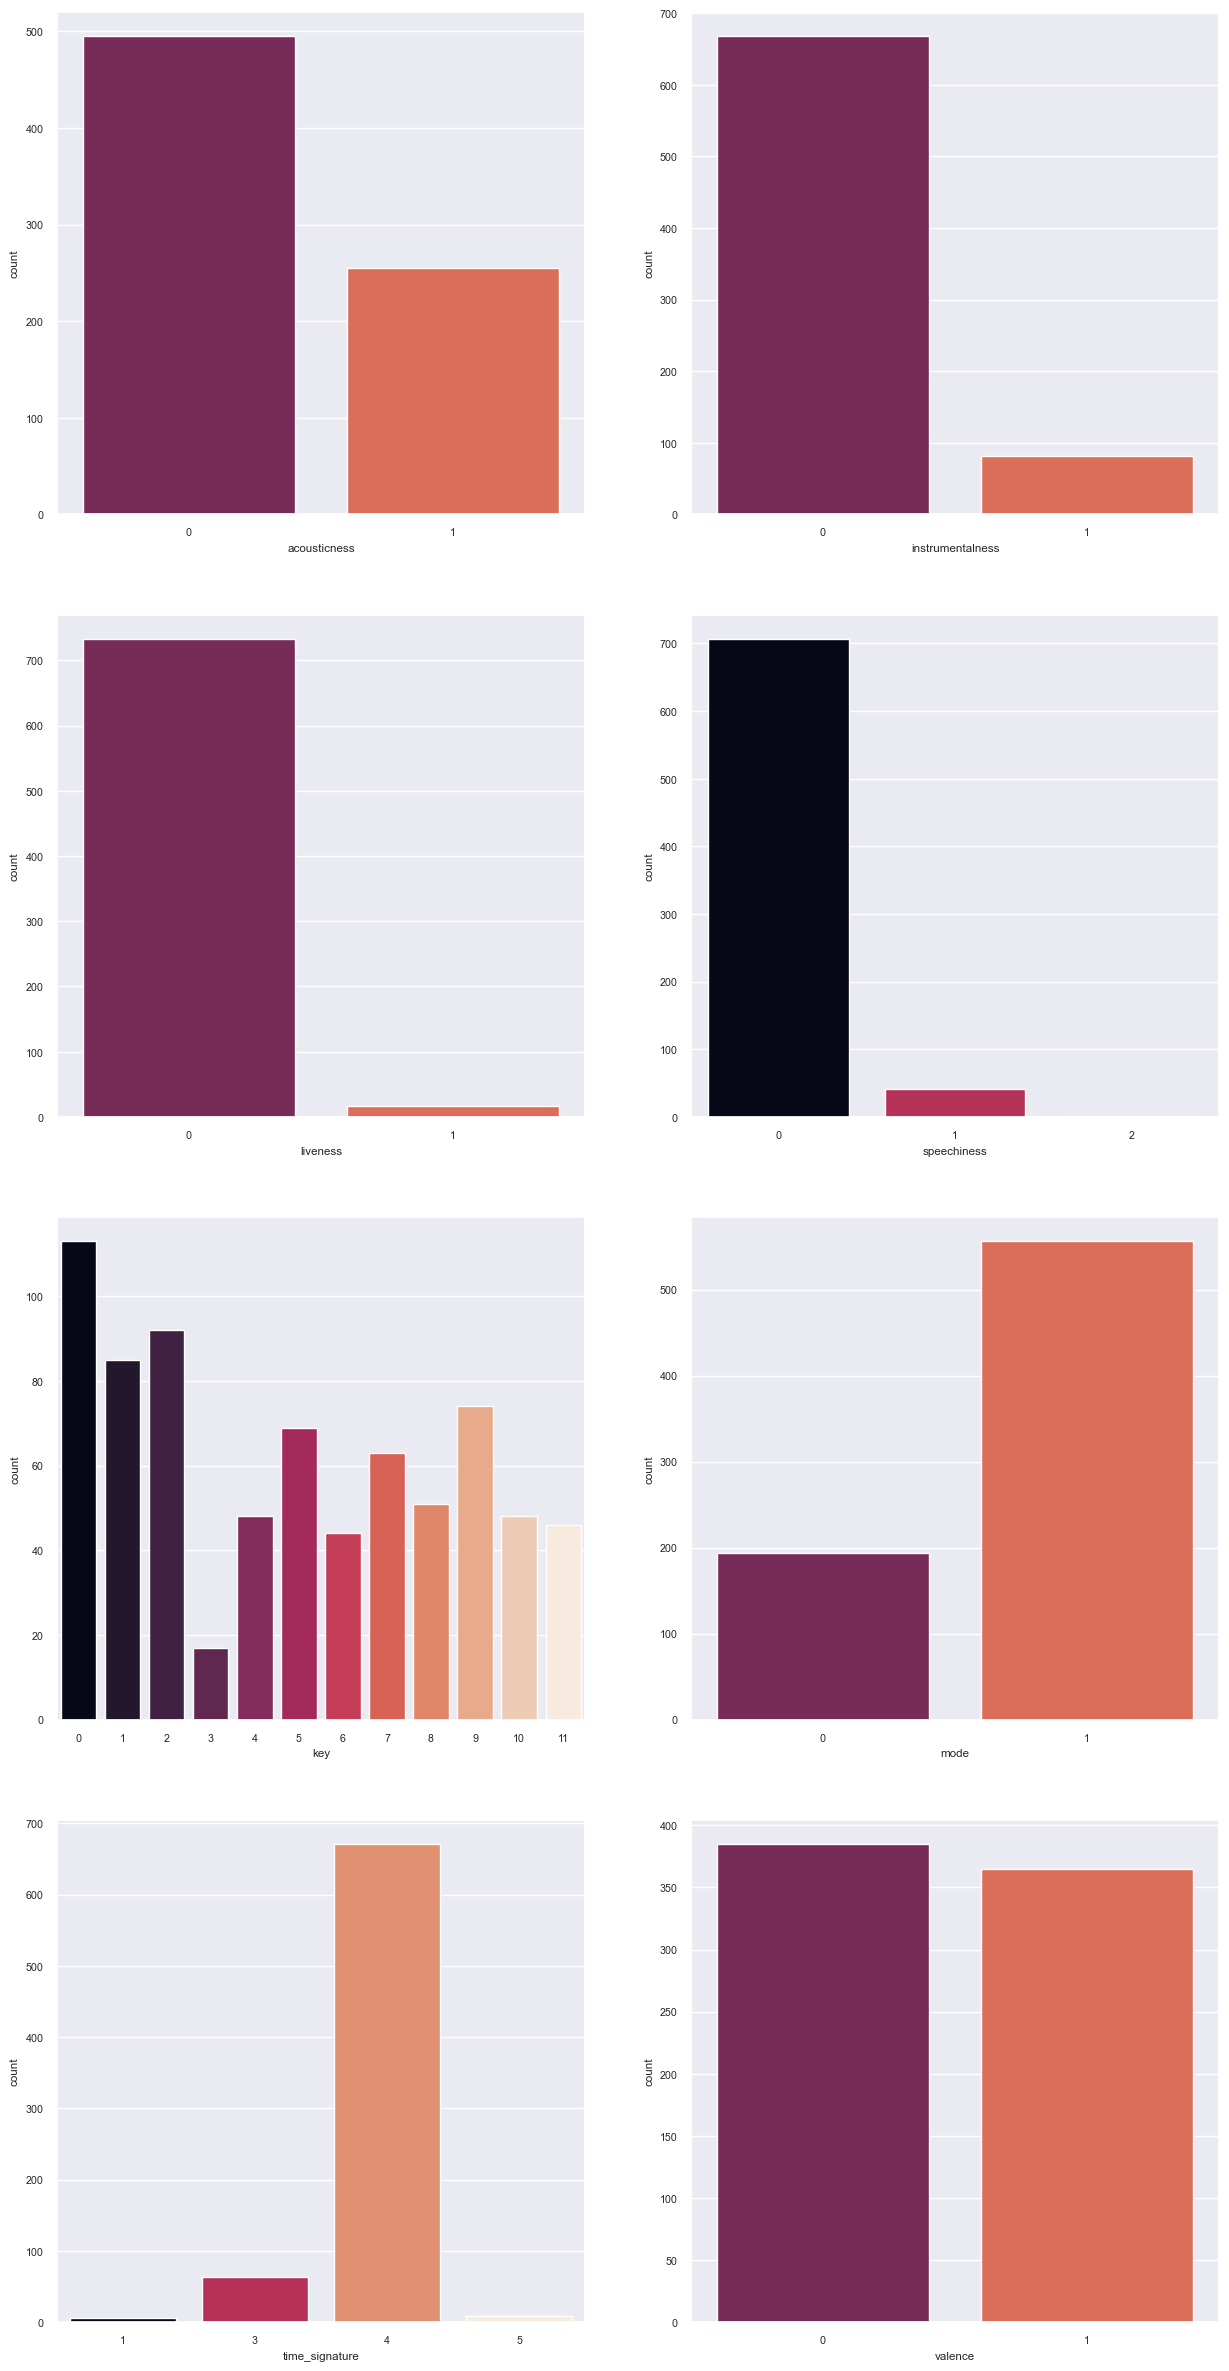

In [55]:
# Crear una figura con subplots
plt.figure(figsize=(15, 30))
for i, c in enumerate(CATEGORICAL_FEATURES, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=c, data=df_copia, palette="rocket", hue=c, legend=False)

Con esta nueva categorización se hace más notables los sesgos presentes en algunas de las variables categoricas que se habían encontrado con la medida de simetria y la curtosis. 

# Grafico de Q-QPlot

Grafico qqplot para la columna 'danceability'

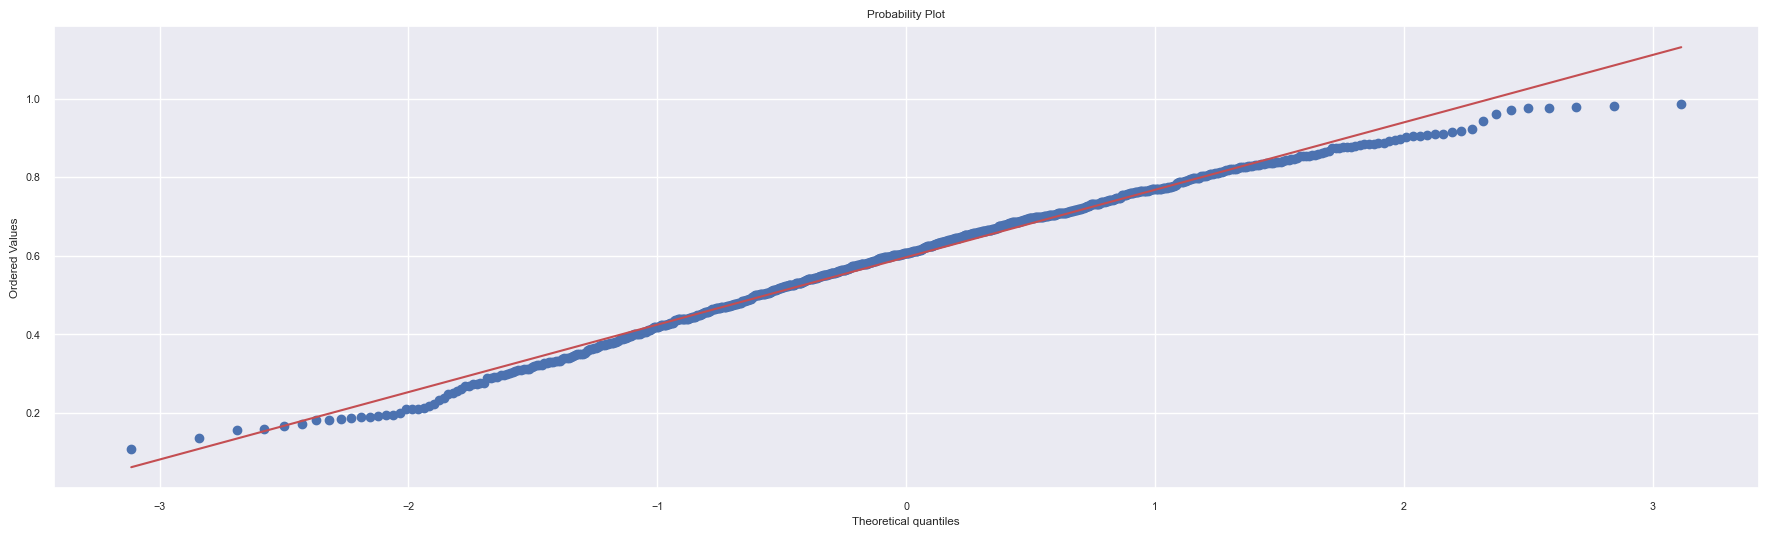

In [56]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df_copia['danceability'], dist="norm", plot=axes);

Grafico qqplot para la columna 'energy'

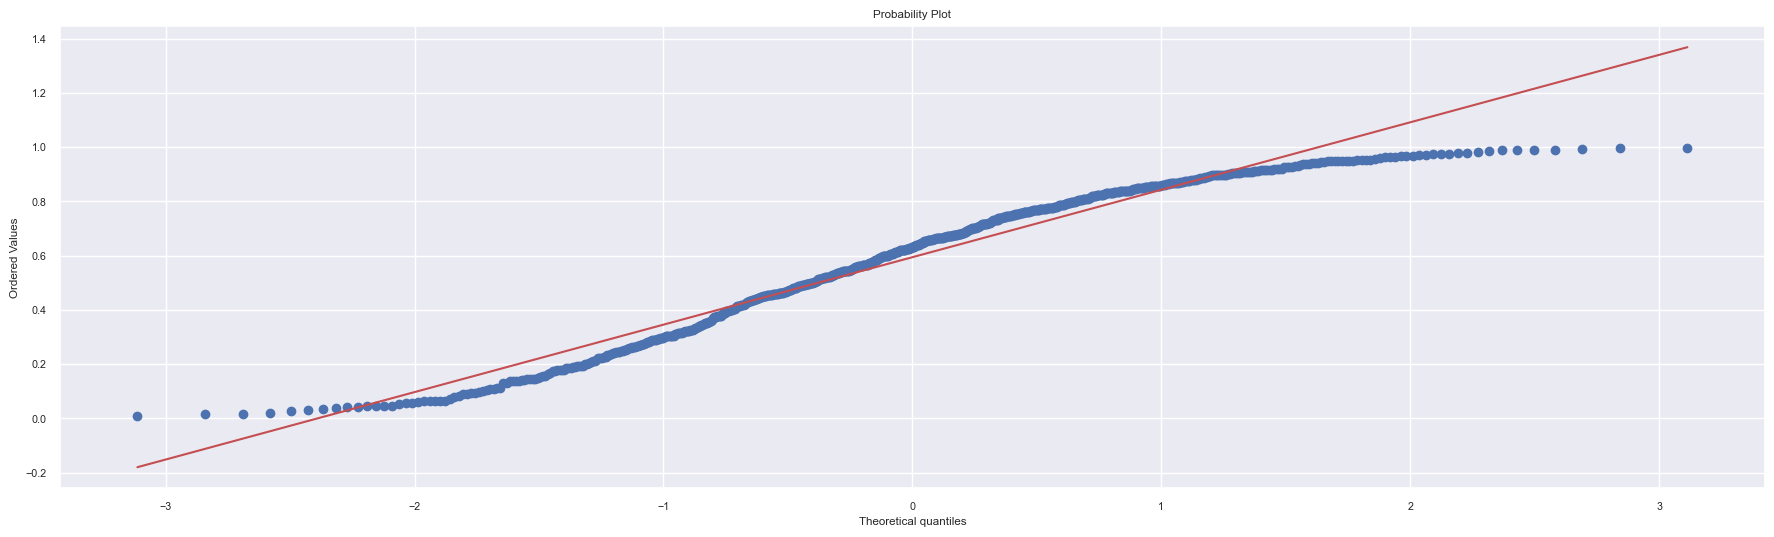

In [57]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df_copia['energy'], dist="norm", plot=axes);

Grafico qqplot para la columna 'loudness'

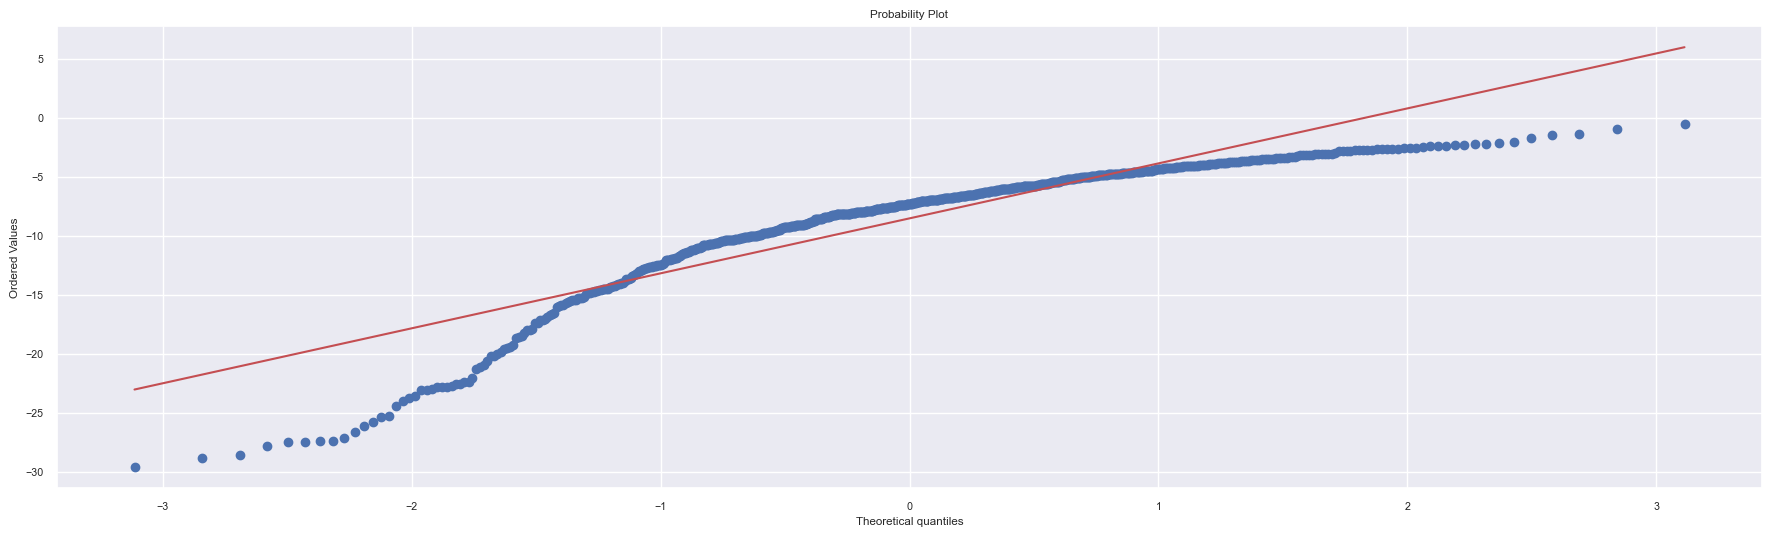

In [58]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df_copia['loudness'], dist="norm", plot=axes);

Grafico qqplot para la columna 'tempo'

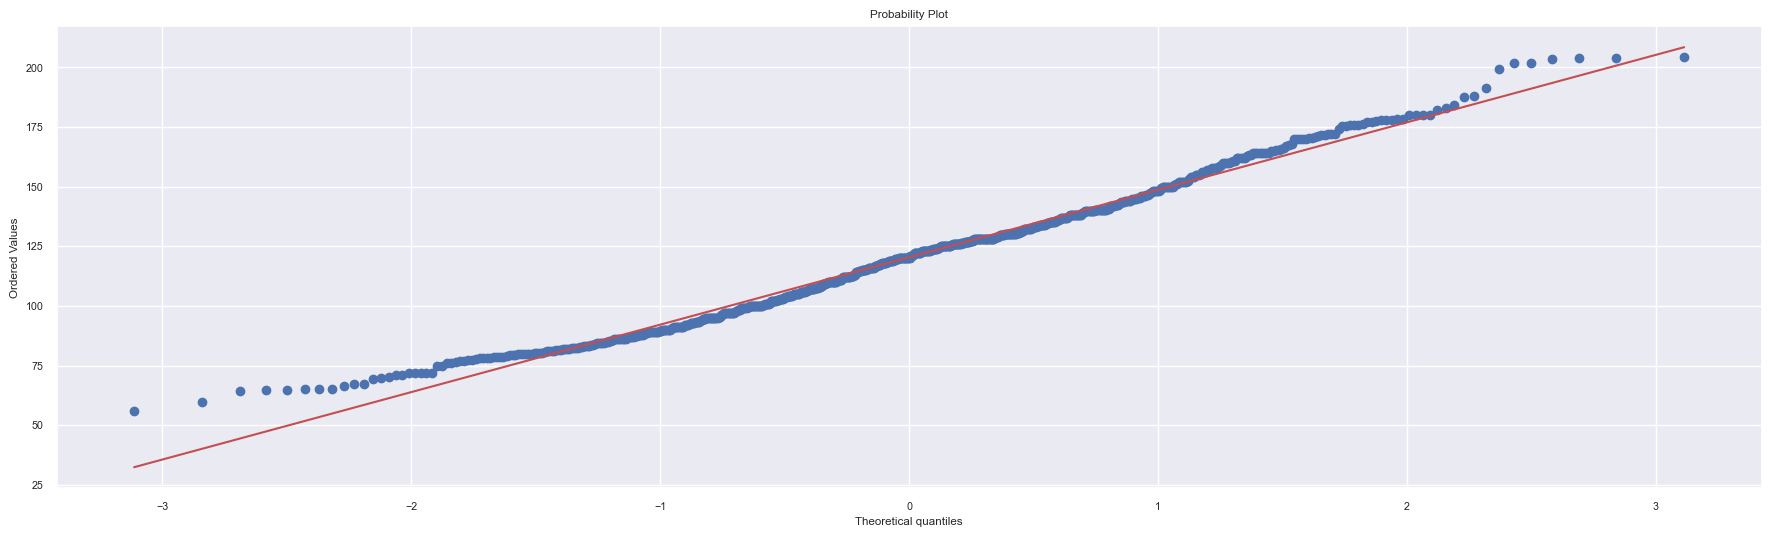

In [59]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(df_copia['tempo'], dist="norm", plot=axes);

In [60]:
df_copia

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,1,0.514,100125,0.521,1,8,0,-14.835,0,0,119.879,4,0,1
1,0,0.714,207019,0.614,0,4,0,-6.935,1,0,123.969,4,1,1
2,0,0.630,216200,0.455,0,5,0,-9.290,1,0,139.931,4,0,1
3,1,0.810,136413,0.221,0,5,0,-11.005,1,0,109.960,4,1,1
4,1,0.465,181440,0.459,0,6,0,-8.137,0,0,90.807,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0.374,333827,0.943,0,6,0,-4.108,0,0,112.084,4,0,0
746,0,0.487,213000,0.867,0,10,0,-3.293,0,0,160.048,4,0,0
747,1,0.605,125867,0.314,0,0,0,-7.631,1,0,138.148,4,1,1
748,0,0.700,249493,0.823,0,3,0,-6.892,1,0,144.060,4,1,1


In [61]:
X = df_copia.drop('label', axis=1)

In [62]:
X


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,0.514,100125,0.521,1,8,0,-14.835,0,0,119.879,4,0
1,0,0.714,207019,0.614,0,4,0,-6.935,1,0,123.969,4,1
2,0,0.630,216200,0.455,0,5,0,-9.290,1,0,139.931,4,0
3,1,0.810,136413,0.221,0,5,0,-11.005,1,0,109.960,4,1
4,1,0.465,181440,0.459,0,6,0,-8.137,0,0,90.807,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0.374,333827,0.943,0,6,0,-4.108,0,0,112.084,4,0
746,0,0.487,213000,0.867,0,10,0,-3.293,0,0,160.048,4,0
747,1,0.605,125867,0.314,0,0,0,-7.631,1,0,138.148,4,1
748,0,0.700,249493,0.823,0,3,0,-6.892,1,0,144.060,4,1


In [63]:
y = df_copia['label']

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
# dividimos el dataset en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, mean_squared_error, r2_score,precision_score,recall_score

In [67]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=15)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_true = y_test,y_pred = y_pred))
print(f1_score(y_true =y_test, y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        75
           1       0.76      0.80      0.78       113

    accuracy                           0.73       188
   macro avg       0.72      0.71      0.71       188
weighted avg       0.73      0.73      0.73       188

0.7137483206448723


In [68]:
df_copia_2 = df_copia.copy()

In [69]:
df_copia_2.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,1,0.514,100125,0.521,1,8,0,-14.835,0,0,119.879,4,0,1
1,0,0.714,207019,0.614,0,4,0,-6.935,1,0,123.969,4,1,1
2,0,0.630,216200,0.455,0,5,0,-9.290,1,0,139.931,4,0,1
3,1,0.810,136413,0.221,0,5,0,-11.005,1,0,109.960,4,1,1
4,1,0.465,181440,0.459,0,6,0,-8.137,0,0,90.807,4,0,1


In [70]:
# Como no tengo valores nulos, voy a introducir valores nulos de forma aleatoria en el dataset para ver como se comporta el modelo
# pero quiero que no sean en todas las columnas sino algunas de forma aleatoria
# import random
# import math

# # semilla
# random.seed(42)

# # Define el porcentaje de valores nulos que deseas introducir en columnas aleatorias
# porcentaje_nulos = 0.2  # 20% de valores nulos

# # Calcula el número de columnas en el DataFrame
# num_columnas = df_copia_2.shape[1]

# # Calcula cuántas columnas deseas seleccionar aleatoriamente
# #num_columnas_seleccionadas = int(porcentaje_nulos * num_columnas)
# num_columnas_seleccionadas = 3


# print("Número de columnas en el DataFrame:", num_columnas)
# print("Número de columnas a seleccionar:", num_columnas_seleccionadas)

# # Selecciona aleatoriamente las columnas en las que deseas introducir valores nulos
# columnas_a_introducir_nulos = np.random.choice(df.columns, num_columnas_seleccionadas, replace=False)

# # Genera índices aleatorios para filas
# num_filas = df_copia_2.shape[0]
# filas_con_nulos = np.random.choice(num_filas, num_filas, replace=True)

# # Establece los valores correspondientes en esas ubicaciones como NaN
# for fila in filas_con_nulos:
#     for columna in columnas_a_introducir_nulos:
#         df_copia_2.at[fila, columna] = np.nan


In [71]:
df_copia_2.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [72]:
# Como no tengo valores nulos, voy a introducir valores nulos de forma aleatoria en el dataset para ver como se comporta el modelo
# pero quiero que no sean en todas las columnas sino algunas de forma aleatoria
# import random
# import math

# # semilla
# random.seed(42)

# # Define el porcentaje máximo de valores nulos que deseas introducir en columnas aleatorias
# porcentaje_nulos_maximo = 0.2  # Por ejemplo, un máximo del 50% de valores nulos

# # Calcula el número de columnas en el DataFrame
# num_columnas = df_copia_2.shape[1]

# # Inicializa un diccionario para rastrear la cantidad de valores nulos por columna
# nulos_por_columna = {}

# # Itera sobre las columnas seleccionadas aleatoriamente
# for columna in np.random.choice(df_copia_2.columns, num_columnas, replace=False):
#     # Calcula el número de filas en la columna actual
#     num_filas = df_copia_2.shape[0]
    
#     # Calcula el porcentaje de valores nulos para esta columna de manera aleatoria
#     porcentaje_nulos_columna = np.random.uniform(0, porcentaje_nulos_maximo)
    
#     # Calcula cuántos valores nulos introducir en esta columna
#     num_nulos_columna = int(porcentaje_nulos_columna * num_filas)
    
#     # Genera índices aleatorios para las filas en esta columna
#     filas_con_nulos_columna = np.random.choice(num_filas, num_nulos_columna, replace=True)
    
#     # Establece los valores correspondientes en esas ubicaciones como NaN
#     for fila in filas_con_nulos_columna:
#         df_copia_2.at[fila, columna] = np.nan
    
#     # Registra la cantidad de valores nulos introducidos en esta columna
#     nulos_por_columna[columna] = num_nulos_columna

In [77]:
df_copia_3 = df.copy()

Vamos a agregar valores NaN en el dataframe original

In [78]:
df_copia_3.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [79]:
# Como no tengo valores nulos, voy a introducir valores nulos de forma aleatoria en el dataset para ver como se comporta el modelo
# pero quiero que no sean en todas las columnas sino algunas de forma aleatoria
import random
import math

# semilla
random.seed(42)

# Define el número de columnas que deseas seleccionar aleatoriamente
num_columnas_seleccionar = 3

# Selecciona aleatoriamente las columnas que se llenarán con valores nulos
columnas_a_introducir_nulos = random.sample(df_copia_3.columns.tolist(), num_columnas_seleccionar)

# Define el porcentaje máximo de valores nulos que deseas introducir en cada columna
porcentaje_nulos_maximo = 0.5  # Por ejemplo, un máximo del 50% de valores nulos

# Inicializa un diccionario para rastrear la cantidad de valores nulos por columna
nulos_por_columna = {}

# Itera sobre las columnas seleccionadas aleatoriamente
for columna in columnas_a_introducir_nulos:
    # Calcula el número de filas en la columna actual
    num_filas = df_copia_3.shape[0]
    
    # Calcula el porcentaje de valores nulos para esta columna de manera aleatoria
    porcentaje_nulos_columna = random.uniform(0, porcentaje_nulos_maximo)
    
    # Calcula cuántos valores nulos introducir en esta columna
    num_nulos_columna = int(porcentaje_nulos_columna * num_filas)
    
    # Genera índices aleatorios para las filas en esta columna
    filas_con_nulos_columna = np.random.choice(num_filas, num_nulos_columna, replace=True)
    
    # Establece los valores correspondientes en esas ubicaciones como NaN
    for fila in filas_con_nulos_columna:
        df_copia_3.at[fila, columna] = np.nan
    
    # Registra la cantidad de valores nulos introducidos en esta columna
    nulos_por_columna[columna] = num_nulos_columna

In [80]:
df_copia_3.isnull().sum()

acousticness         50
danceability         87
duration              0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               234
time_signature        0
valence               0
label                 0
dtype: int64

In [81]:
df_copia_3.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
